#### The dataset contains the amount of energy sources in frequency of 5 minutes from 2019/01/01 to 2021/12/31 (California)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

%matplotlib inline

In [68]:
#read Master sources.csv
df = pd.read_csv('Master sources.csv')

In [69]:
#make index = Date
df['Date'] = pd.date_range(start = '2019-01-01',end = '2021-12-31 23:55:00', freq='5Min')
df=df.set_index('Date')

In [70]:
df.head()

,Time,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Other,Natural Gas,Large Hydro
Date,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0:00,0.0,2810.0,993.0,380.0,225.0,200.0,11.0,2273.0,7326.0,1924.0,6.0,6254.0,0.0,NaN,NaN
2019-01-01 00:05:00,0:05,0.0,2862.0,993.0,381.0,226.0,201.0,11.0,2273.0,7200.0,1866.0,65.0,6266.0,0.0,NaN,NaN
2019-01-01 00:10:00,0:10,0.0,2916.0,993.0,380.0,226.0,202.0,11.0,2272.0,7057.0,1849.0,64.0,6319.0,0.0,NaN,NaN
2019-01-01 00:15:00,0:15,0.0,2920.0,993.0,378.0,223.0,203.0,11.0,2272.0,7007.0,1827.0,25.0,6354.0,0.0,NaN,NaN
2019-01-01 00:20:00,0:20,0.0,2902.0,993.0,379.0,223.0,203.0,11.0,2273.0,6970.0,1840.0,32.0,6360.0,0.0,NaN,NaN


In [71]:
#Handle duplicate columns in Master sources.csv
df['Natural gas'] = df['Natural gas'].fillna(df['Natural Gas'])
df['Large hydro'] = df['Large hydro'].fillna(df['Large Hydro'])
df = df.drop('Natural Gas', axis=1)
df = df.drop('Large Hydro', axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315648 entries, 2019-01-01 00:00:00 to 2021-12-31 23:55:00
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         315648 non-null  object 
 1   Solar        315612 non-null  float64
 2   Wind         315612 non-null  float64
 3   Geothermal   315324 non-null  float64
 4   Biomass      315612 non-null  float64
 5   Biogas       315612 non-null  float64
 6   Small hydro  315612 non-null  float64
 7   Coal         315612 non-null  float64
 8   Nuclear      315612 non-null  float64
 9   Natural gas  315324 non-null  float64
 10  Large hydro  315612 non-null  float64
 11  Batteries    315612 non-null  float64
 12  Imports      315324 non-null  float64
 13  Other        315612 non-null  float64
dtypes: float64(13), object(1)
memory usage: 36.1+ MB


In [73]:
df.describe()

,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Other
count,315612.000000,315612.000000,315324.000000,315612.000000,315612.000000,315612.000000,315612.000000,315612.000000,315324.000000,315612.00000,315612.000000,315324.000000,315612.000000
mean,3560.406997,2021.756267,890.270404,311.254981,212.566452,264.012620,14.244313,1866.857509,8295.311587,1897.52217,-5.021061,6029.442041,0.001125
std,4373.665823,1300.621898,115.978750,48.243616,15.382964,778.084339,4.574629,578.826474,3972.605846,1288.84060,191.045755,2614.741791,0.033519
min,-145.000000,-2476.000000,-134.000000,125.000000,101.000000,-2826.000000,-8.000000,-74.000000,-280718.000000,-576.00000,-1614.000000,-22949.000000,0.000000
25%,-34.000000,869.000000,866.000000,279.000000,204.000000,166.000000,11.000000,1145.000000,5483.000000,908.00000,-31.000000,4251.000000,0.000000
50%,114.000000,1833.000000,909.000000,315.000000,213.000000,227.000000,15.000000,2259.000000,8004.000000,1551.00000,-3.000000,6466.000000,0.000000
75%,7969.000000,3053.000000,958.000000,344.000000,222.000000,338.000000,18.000000,2269.000000,10376.000000,2733.00000,17.000000,8070.000000,0.000000
max,13191.000000,36275.000000,1134.000000,499.000000,267.000000,431490.000000,30.000000,2290.000000,26540.000000,6362.00000,1479.000000,11832.000000,1.000000


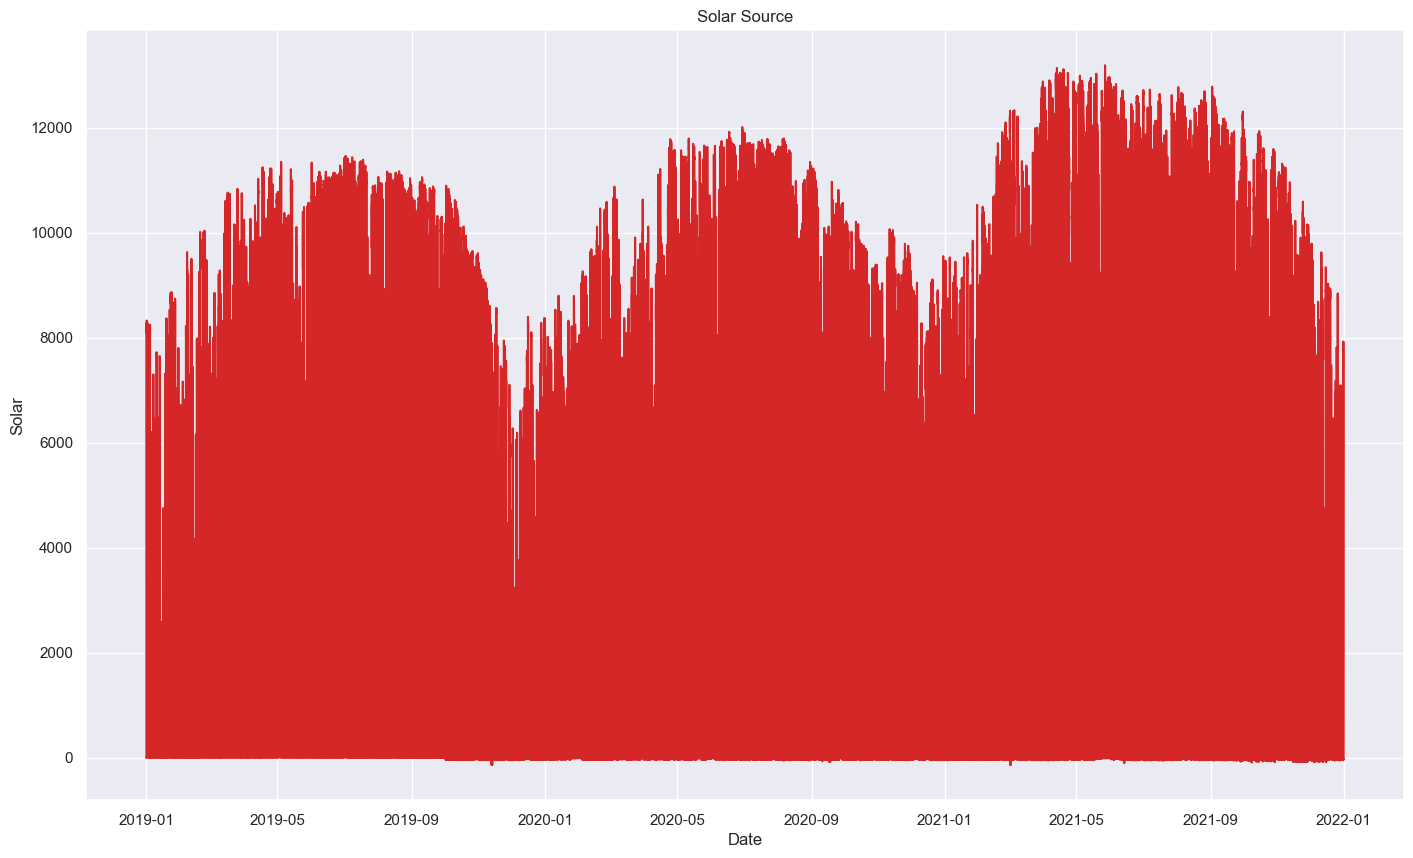

In [74]:
#Plot Solar source distribution
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Solar', dpi=100):
    plt.figure(figsize=(17,10), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.Solar, title='Solar Source') 

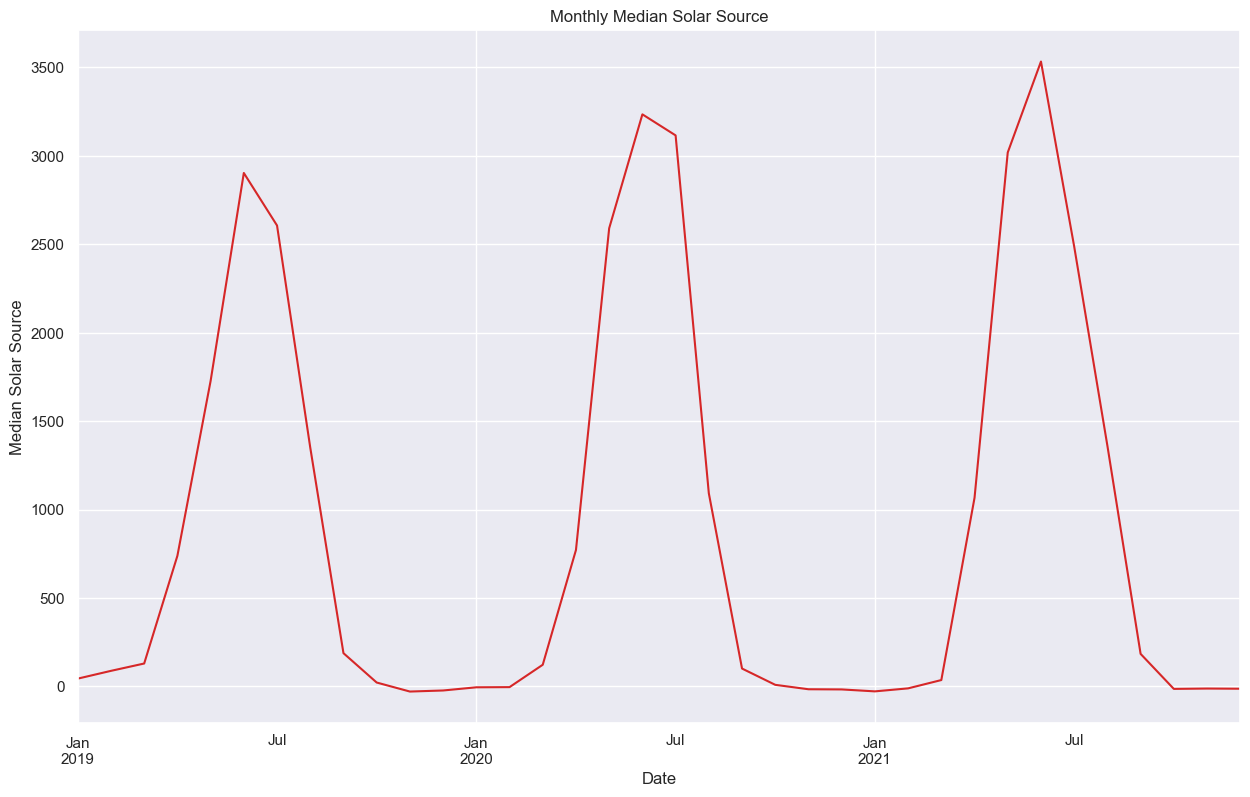

In [75]:
#Median Solar Source per Month
daily = df['Solar'].resample('M').median()
daily.plot(style=['-'],color='tab:red',figsize=(15,9))
plt.ylabel('Median Solar Source');
plt.title('Monthly Median Solar Source');

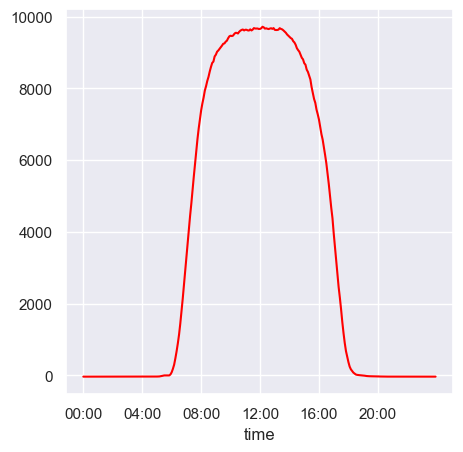

In [76]:
#Median Solar Source by daytime
by_time = df['Solar'].groupby(df.index.time).median()

plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-'],c='red');

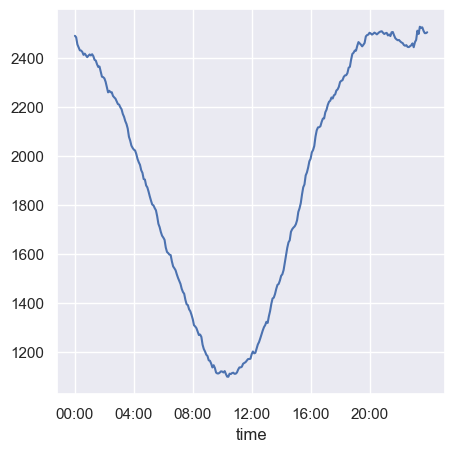

In [77]:
#Median Wind source by daytime
by_time2 = df['Wind'].groupby(df.index.time).median()

plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-']);


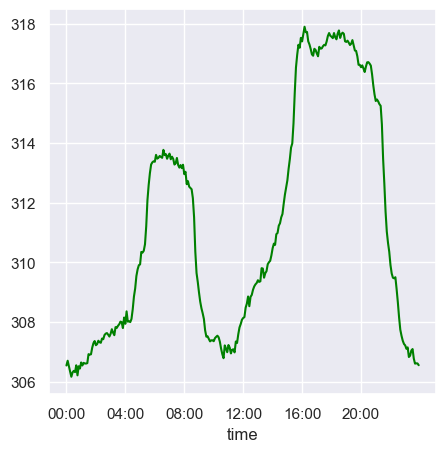

In [78]:
#Mean Biomass source by daytime
by_time2 = df['Biomass'].groupby(df.index.time).mean()

plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='green');

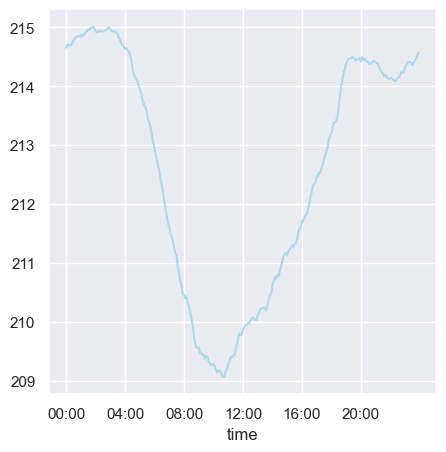

In [79]:
#Mean Biogas source by daytime
by_time2 = df['Biogas'].groupby(df.index.time).mean()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='lightblue');

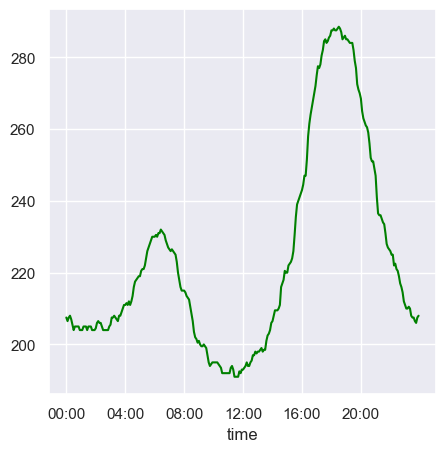

In [80]:
#Median Small Hydro source by daytime
by_time2 = df['Small hydro'].groupby(df.index.time).median()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='green');

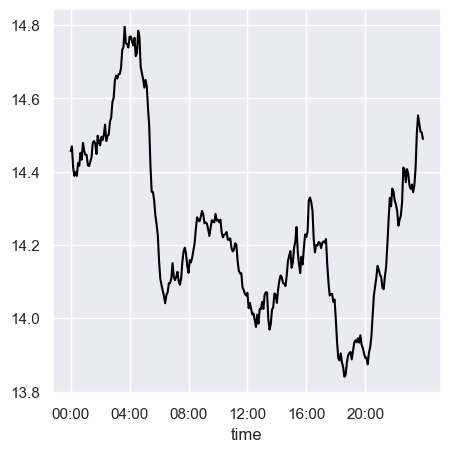

In [81]:
#Mean Coal source by daytime
by_time2 = df['Coal'].groupby(df.index.time).mean()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='black');

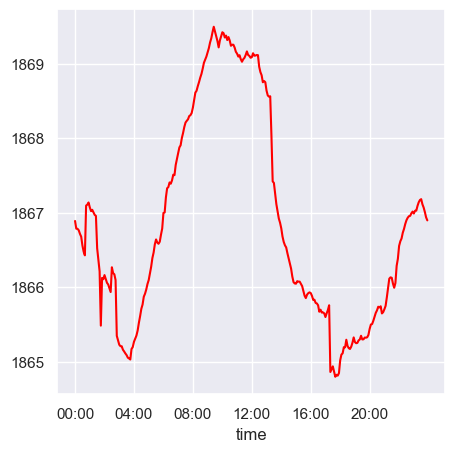

In [82]:
#Mean Nuclear source by daytime
by_time2 = df['Nuclear'].groupby(df.index.time).mean()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='red');

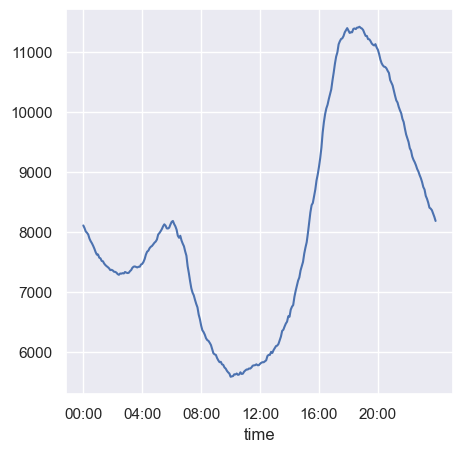

In [83]:
#Median Natural Gas scource by daytime
by_time2 = df['Natural gas'].groupby(df.index.time).median()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-']);

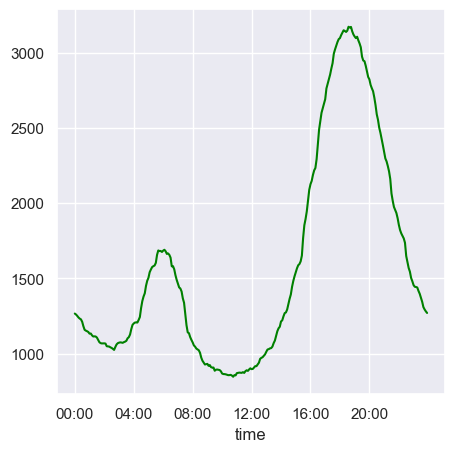

In [84]:
#Median Large Hydro scource by Time
by_time2 = df['Large hydro'].groupby(df.index.time).median()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='green');

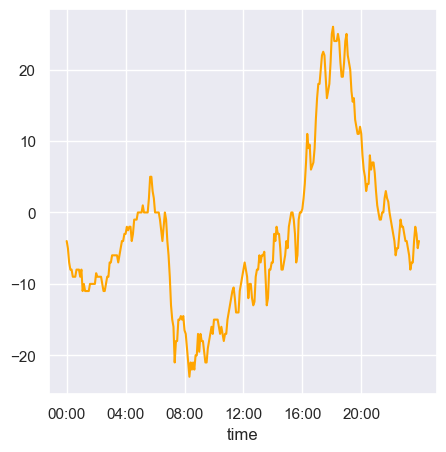

In [85]:
#Median batteries energy source by daytime
by_time2 = df['Batteries'].groupby(df.index.time).median()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='orange');

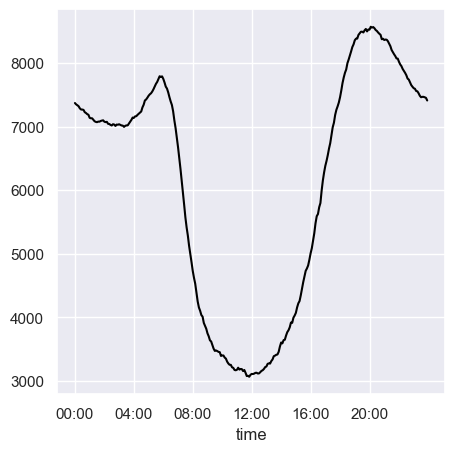

In [86]:
#Median imports scource by daytime
by_time2 = df['Imports'].groupby(df.index.time).median()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='black');

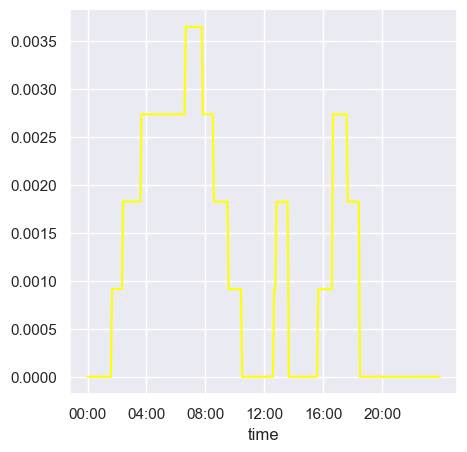

In [87]:
#Mean of others scources by daytime
by_time2 = df['Other'].groupby(df.index.time).mean()
plt.figure(figsize=(5,5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time2.plot(xticks=hourly_ticks, style=['-'], c='yellow');